In [1]:
import cmb_utils
import numpy as np
import pyfftw
import pyfftw.interfaces.numpy_fft as fft
from scipy.interpolate import interp1d
from scipy import linalg as LA
from scipy.integrate import trapz
from scipy.special import jv
import matplotlib.pyplot as plt

import camb
import fiducial_parameters as fp
import importlib

In [2]:
# Get C_l from CAMB
pars = cmb_utils.fast_camb_settings() # Use this from what Kiyo gave us
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Cls = totCL[:,0] # this goes out to l = 1500 per the settings 
CAMB_PS = Cls

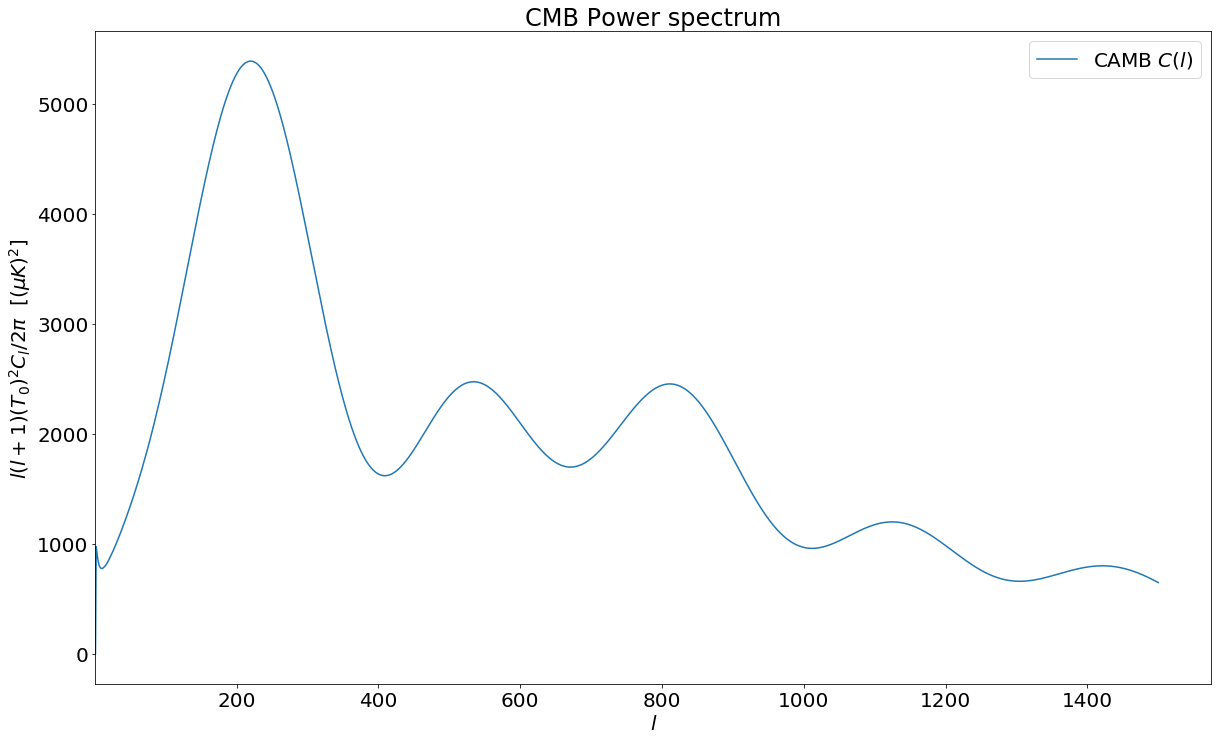

In [3]:
# Plot CAMB result 
# Note we are plotting the power spectrum multiplied with l(l+1)T_0**2/(2pi)
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 20})
plt.plot(ls, Cls, label='CAMB $C(l)$')
plt.xlabel("$l$")
plt.ylabel(r"$l(l+1)(T_0)^2C_l/2\pi$  $[(\mu K)^2]$")
plt.legend()
plt.xlim(left=1)
plt.title("CMB Power spectrum");

In [4]:
# define the window function
def E_alpha(l_bins, lmax, alpha):
    l_grid = np.zeros(lmax) # indices goes from 0 to lmax-1, but corresponds to l = 1 to lmax
    # find the integer l values in between the bin edges (right now some overlap can occur, fix later)
    l_start = int((l_bins[alpha])) # note the endpoint of the previous bin was not covered
    l_end = int(l_bins[alpha+1])
    #print(l_start, l_end)
    l_grid[l_start-1:l_end-1] = 1
    if l_bins[alpha + 1] == lmax:
        l_grid[lmax-1] =1
    return l_grid

In [5]:
n_bins = 30 # total number of bins
lmin = 1
lmax = pars.max_l # get from CAMB parameters, should be 1500
l_bins = np.linspace(lmin, lmax, endpoint = True, num = n_bins + 1) # bin edges

In [6]:
# Get bin centers
bin_centers = [(l_bins[alpha] + l_bins[alpha+1])/2 for alpha in range(n_bins)]

In [7]:
# Get band power from the initial guess Cls (from CAMB)
Cl_binned = np.zeros(n_bins)
for alpha in range(n_bins):
    Cl_binned[alpha] = np.sum(E_alpha(l_bins, lmax, alpha)*CAMB_PS[1:])/np.sum(E_alpha(l_bins, lmax, alpha))

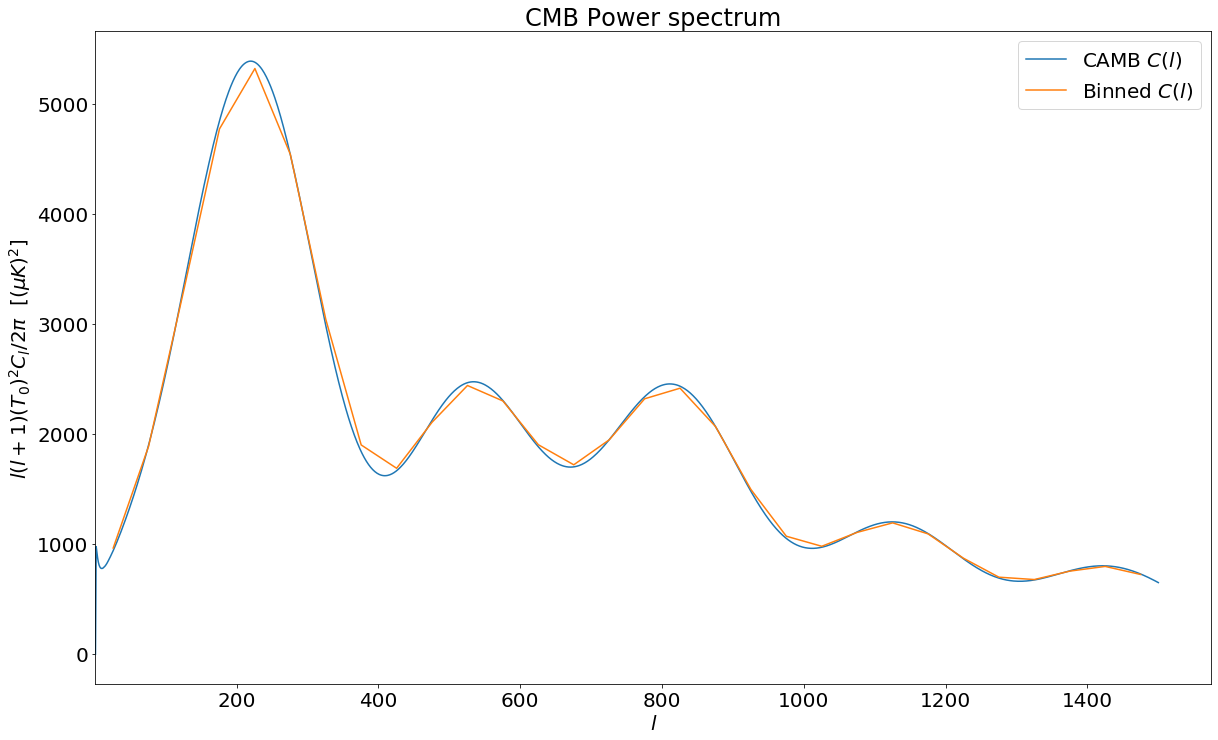

In [8]:
# Plot CAMB result 
# Note we are plotting the power spectrum multiplied with l(l+1)T_0**2/(2pi)
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 20})
plt.plot(ls[1:], CAMB_PS[1:], label='CAMB $C(l)$')
plt.plot(bin_centers, Cl_binned, label='Binned $C(l)$')
plt.xlabel("$l$")
plt.ylabel(r"$l(l+1)(T_0)^2C_l/2\pi$  $[(\mu K)^2]$")
plt.legend()
plt.xlim(left=1)
plt.title("CMB Power spectrum");